This notebook uses auto-regression techniques to study the behavior in the calibration value.

In [26]:
#import the stuff
import pandas as pd #dataframes etc
import matplotlib.pyplot as plt #plotting
import numpy as np
from sklearn import preprocessing
from common.utils import TimeSeriesTensor, create_evaluation_df, mape, scale_shrinker

In [37]:
#load the data
test = pd.read_csv('../data/test_avg.csv', index_col=0)
valid = pd.read_csv('../data/valid_avg.csv', index_col=0)
train = pd.read_csv('../data/train_avg.csv', index_col=0)
full = train.append([valid,test])
full.head()

,p2_calib,int_deliv_inv_ub
2018-05-12 08:37:21,0.912935,8.136180e+09
2018-05-12 20:37:21,0.912406,8.423336e+09
2018-05-13 08:37:21,0.913120,8.863988e+09
2018-05-13 20:37:21,0.911564,9.304112e+09
2018-05-14 08:37:21,0.912341,9.634645e+09


In [38]:
full.tail()

,p2_calib,int_deliv_inv_ub
2018-12-02 10:27:23,0.910266,6.784826e+10
2018-12-02 11:27:23,0.910792,6.784826e+10
2018-12-02 12:27:23,0.910588,6.784826e+10
2018-12-02 13:27:23,0.910575,6.784826e+10
2018-12-02 14:27:23,0.910599,6.784826e+10


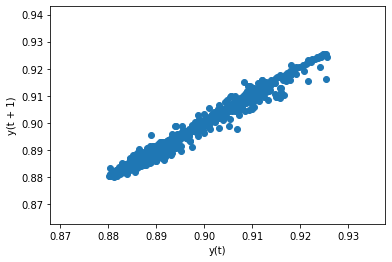

In [39]:
pd.plotting.lag_plot(full.p2_calib, lag=1)

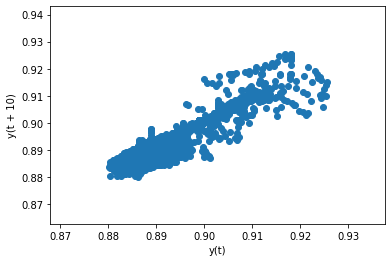

In [40]:
pd.plotting.lag_plot(full.p2_calib, lag=10)

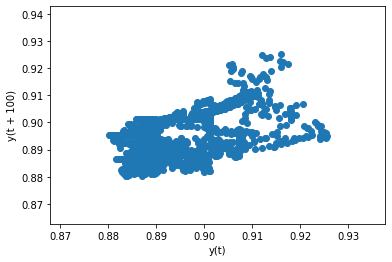

In [41]:
pd.plotting.lag_plot(full.p2_calib, lag=100)

In [42]:
#pd.plotting.lag_plot(test.int_deliv_inv_ub, lag=1)

In [43]:
#pd.plotting.lag_plot(test.int_deliv_inv_ub, lag=10)

In [44]:
#pd.plotting.lag_plot(test.int_deliv_inv_ub, lag=100)

(-0.5, 1)

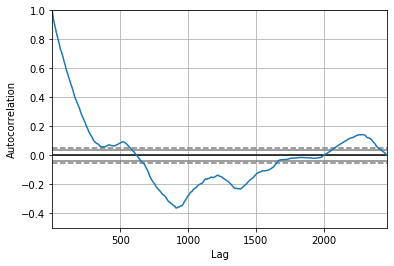

In [45]:
pd.plotting.autocorrelation_plot(full.p2_calib)
plt.ylim([-0.5, 1])

In [46]:
#pd.plotting.autocorrelation_plot(test.int_deliv_inv_ub)
#plt.ylim([-.2,1])

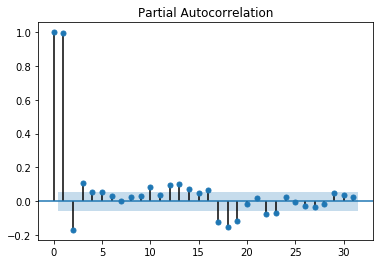

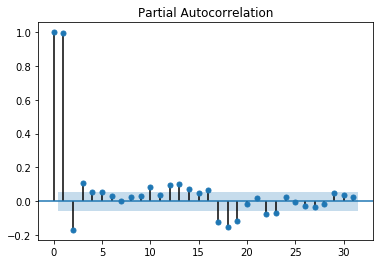

In [47]:
#partial auto-correlation
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(test.p2_calib)

In [48]:
#now lets try some autoregression
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [54]:
model = AutoReg(full.p2_calib, 10, trend='ct')
results = model.fit()
results.summary()

/home/rusack/evans908/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/rusack/evans908/.local/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               p2_calib   No. Observations:                 2469
Model:                    AutoReg(10)   Log Likelihood               13402.311
Method:               Conditional MLE   S.D. of innovations              0.001
Date:                Thu, 11 Mar 2021   AIC                            -13.728
Time:                        15:00:33   BIC                            -13.697
Sample:                            10   HQIC                           -13.717
                                 2469                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0060      0.002      2.873      0.004       0.002       0.010
trend         5.797e-08   3.06e-08      1.897      0.058   -1.94e-09    1.18e-07
p2_calib.L1      1.1050      0.020     54.812      0.000       1.065       1.145
p2_calib.L2     -0.1390      0.030     -4.628      0.000      -0.198      -0.080
p2_calib.L3      0.0209      0.030      0.694      0.488      -0.038       0.080
p2_calib.L4     -0.0501      0.030     -1.665      0.096      -0.109       0.009
p2_calib.L5     -0.0165      0.030     -0.547      0.584      -0.075       0.043
p2_calib.L6      0.0356      0.030      1.183      0.237      -0.023       0.095
p2_calib.L7      0.0446      0.030      1.482      0.138      -0.014       0.104
p2_calib.L8     -0.0852      0.030     -2.833      0.005      -0.144      -0.026
p2_calib.L9      0.0537      0.030      1.790      0.073      -0.005       0.112
p2_calib.L10     0.0242      0.020      1.204      0.228      -0.015       0.064
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0057           -0.0000j            1.0057           -0.0000
AR.2             1.1447           -0.5520j            1.2708           -0.0715
AR.3             1.1447           +0.5520j            1.2708            0.0715
AR.4             0.6516           -1.2367j            1.3979           -0.1728
AR.5             0.6516           +1.2367j            1.3979            0.1728
AR.6            -0.4004           -1.2827j            1.3437           -0.2982
AR.7            -0.4004           +1.2827j            1.3437            0.2982
AR.8            -1.3151           -0.6329j            1.4595           -0.4286
AR.9            -1.3151           +0.6329j            1.4595            0.4286
AR.10           -3.3837           -0.0000j            3.3837           -0.5000
------------------------------------------------------------------------------
"""

No handles with labels found to put in legend.


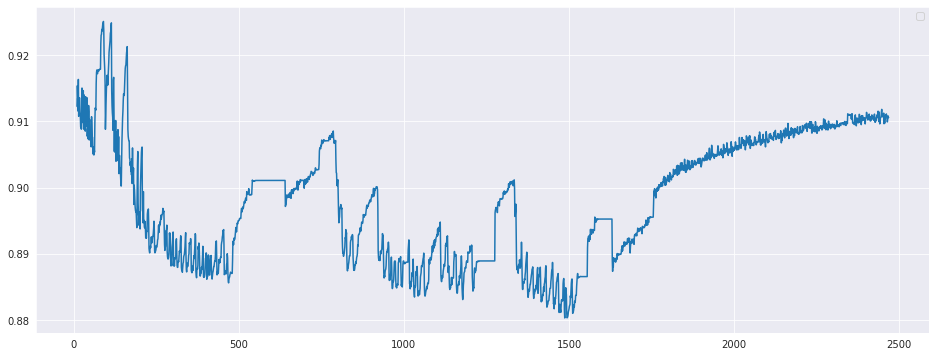

In [55]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(16,6))

figure = results.plot_predict()

/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


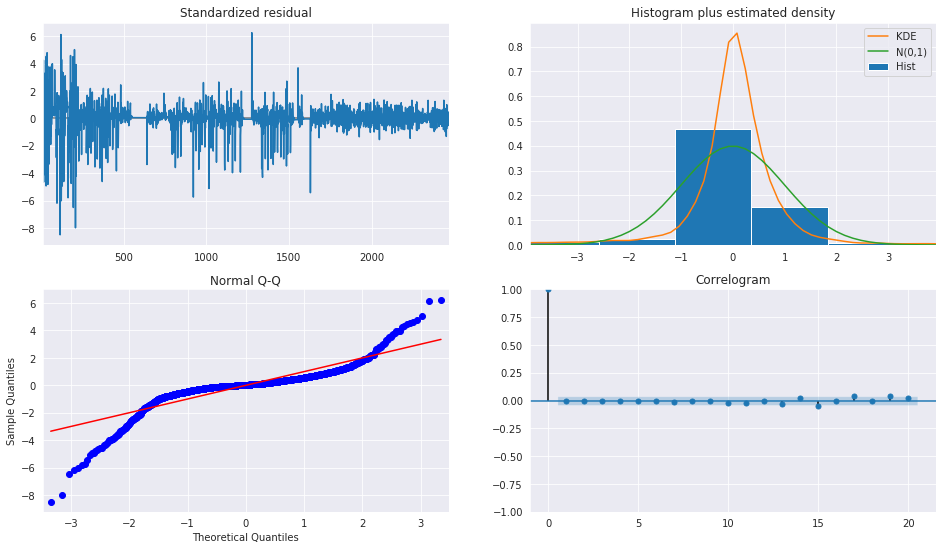

In [56]:
fig = plt.figure(figsize=(16,9))
fig = results.plot_diagnostics(fig=fig, lags=20)

In [61]:
#lets pool the valid and train data together
train = train.append(valid)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
blah = scaler.fit_transform(train)
blah[:]

array([[0.70198366, 0.        ],
       [0.68950279, 0.00527083],
       [0.70634362, 0.01335912],
       ...,
       [0.8985598 , 1.        ],
       [0.89921205, 1.        ],
       [0.8990744 , 1.        ]])

In [ ]:
test['p2_calib'] = scaler.transform(test)